### Import all libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import exifread
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from import_WS import *
from Yang_model import *
from Bird_model import *
from RMSE import *
from nearest import *
from process_SODA import *

### Import weather station data

In [2]:
CSV_file1 = './weather_data/Jan2016.csv'
CSV_file3 = './weather_data/Mar2016.csv'
CSV_file4 = './weather_data/Apr2016.csv'
CSV_file5 = './weather_data/May2016.csv'
CSV_file6 = './weather_data/June2016.csv'
CSV_file7 = './weather_data/July2016.csv'
CSV_file8 = './weather_data/Aug2016.csv'
CSV_file9 = './weather_data/Sep2016.csv'

# Load the weather station datas. Please note that this function is written based on the format of our Davis weather station. 
# You may need to change the format based on your data format
(time_range1,solar_range1) = import_WS(CSV_file1)
(time_range3,solar_range3) = import_WS(CSV_file3)
(time_range4,solar_range4) = import_WS(CSV_file4)
(time_range5,solar_range5) = import_WS(CSV_file5)
(time_range6,solar_range6) = import_WS(CSV_file6)
(time_range7,solar_range7) = import_WS(CSV_file7)
(time_range8,solar_range8) = import_WS(CSV_file8)
(time_range9,solar_range9) = import_WS(CSV_file9)

### Concatenating all the datetime observations together

In [3]:
time_range = time_range1
time_range.extend(time_range3)
time_range.extend(time_range4)
time_range.extend(time_range5)
time_range.extend(time_range6)
time_range.extend(time_range7)
time_range.extend(time_range8)
time_range.extend(time_range9)

solar_range = solar_range1
solar_range.extend(solar_range3)
solar_range.extend(solar_range4)
solar_range.extend(solar_range5)
solar_range.extend(solar_range6)
solar_range.extend(solar_range7)
solar_range.extend(solar_range8)
solar_range.extend(solar_range9)

### Sorting all unique dates from the list

In [4]:
completedatelist = []
datelist = []

for onetime in time_range:
    completedatelist.append(onetime.strftime("%Y-%m-%d-%H-%M-%S"))
    datelist.append(onetime.strftime("%Y-%m-%d"))
    
    
unik_dates = list(set(datelist))
unik_dates.sort()

## Computing clear-sky radiations for various existing models.

We manually select all the clear-sky days in Singapore for the available weatherstation observations. It is important to note here that the occurence of "complete" clear-sky day is rare in Singapore.

We observe that the following dates ['2016-03-28','2016-04-07','2016-04-08','2016-08-10','2016-08-20','2016-09-06'] (in YYYY-MM-DD format) in the year 2016 can be considered as *clear-sky days* in Singapore.

### McClear model

More information on McClear model can be found at: http://www.soda-pro.com/web-services/radiation/cams-mcclear

The individual CSV files are downloaded from the above site, for the specific clear-sky days.

In [5]:
sd1 = './soda_files/2016-03-27.csv'
sd2 = './soda_files/2016-04-06.csv'
sd3 = './soda_files/2016-08-09.csv'
sd4 = './soda_files/2016-08-19.csv'
sd5 = './soda_files/2016-09-05.csv'

(dt1,sol1) = process_SODA(sd1)
(dt2,sol2) = process_SODA(sd2)
(dt3,sol3) = process_SODA(sd3)
(dt4,sol4) = process_SODA(sd4)
(dt5,sol5) = process_SODA(sd5)

dt = dt1
dt.extend(dt2)
dt.extend(dt3)
dt.extend(dt4)
dt.extend(dt5)

sol = list(sol1)
sol.extend(list(sol2))
sol.extend(list(sol3))
sol.extend(list(sol4))
sol.extend(list(sol5))

print ('The total number of datapoints is', str(len(dt)))
print ('The total number of datapoints is', str(len(sol)))

The total number of datapoints is 15840
The total number of datapoints is 15840


### Bird model and Yang model

The implementation of Bird clear sky model is taken from Luke Witmer's fantastic <a href="https://github.com/lukewitmer/BirdClearSkyModel-Python">python implementation of the model</a>.

The implementation of Yang model is done via <a href="https://github.com/Soumyabrata/clear-sky-models/blob/master/Yang_model.py">this</a> function.

----------------------------------------------------------
Results for  2016-03-28
Bird model Correlation =  0.898030924708
Yang model Correlation =  0.898887597776
McClear model Correlation =  0.898050926953
Bird model RMSE = 187.043132807
Yang model RMSE = 173.077774778
McClear model RMSE = 165.450011431
----------------------------------------------------------
Results for  2016-04-07
Bird model Correlation =  0.976616941194
Yang model Correlation =  0.994611628997
McClear model Correlation =  0.994893338388
Bird model RMSE = 114.840026548
Yang model RMSE = 66.4837422447
McClear model RMSE = 41.0493799633
----------------------------------------------------------
Results for  2016-04-08
Bird model Correlation =  0.88428804951
Yang model Correlation =  0.92651919457
McClear model Correlation =  0.926626053726
Bird model RMSE = 223.178354864
Yang model RMSE = 176.883214875
McClear model RMSE = 157.701978714
----------------------------------------------------------
Results for  2016-0

/usr/local/lib/python3.6/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


Bird model Correlation =  0.91361519643
Yang model Correlation =  0.923126946262
McClear model Correlation =  0.922747184478
Bird model RMSE = 175.491884721
Yang model RMSE = 151.507836895
McClear model RMSE = 146.216509538
----------------------------------------------------------
Results for  2016-08-20
Bird model Correlation =  0.965240928629
Yang model Correlation =  0.982769716944
McClear model Correlation =  0.982346095105
Bird model RMSE = 108.847363961
Yang model RMSE = 70.2706413298
McClear model RMSE = 66.6596885158
----------------------------------------------------------
Results for  2016-09-06
Bird model Correlation =  0.970792932405
Yang model Correlation =  0.985114887549
McClear model Correlation =  0.98518024628
Bird model RMSE = 108.337928795
Yang model RMSE = 69.6478908867
McClear model RMSE = 61.5063181608


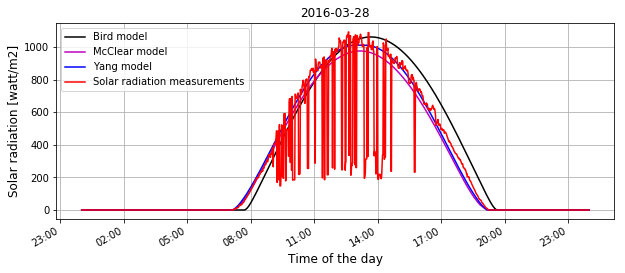

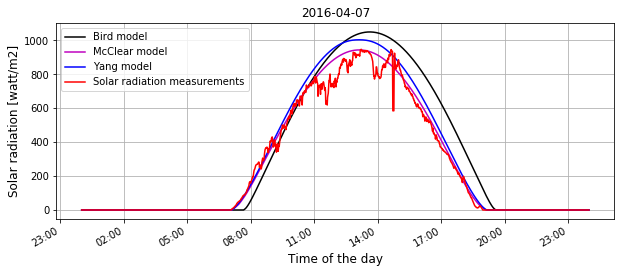

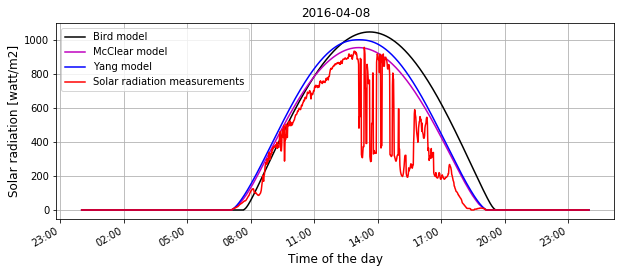

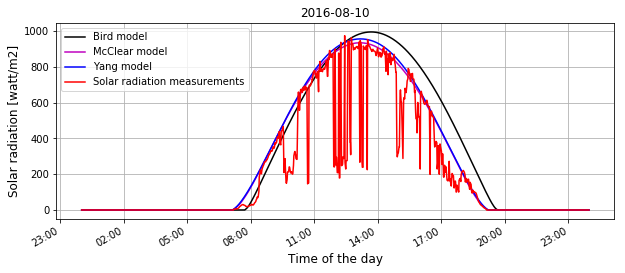

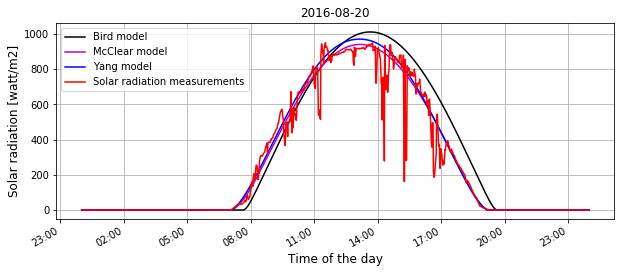

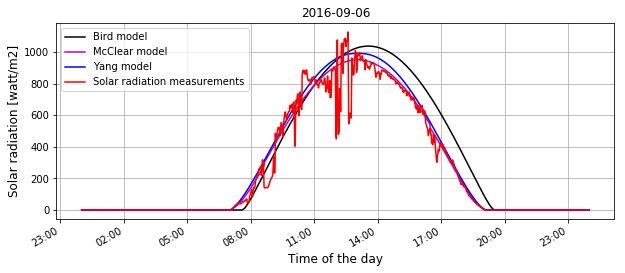

In [6]:
L = ['2016-03-28','2016-04-07','2016-04-08','2016-08-10','2016-08-20','2016-09-06'] # For all the clear sky days
# L = ['2016-04-07'] # For a sample day 

BMC = []
YMC = []
MMC = []


BMC_rmse = []
YMC_rmse = []
MMC_rmse = []


for kot,particulardate in enumerate(L):
    
    print ('----------------------------------------------------------')
    print ('Results for ', particulardate)
    
    indices = [i for i, x in enumerate(datelist) if x == particulardate]
    
    dateaxis = [time_range[y] for y in indices]
    solarvalues = [int(solar_range[y]) for y in indices]
    solarvalues = np.array(solarvalues)
    
    # Bird & Yang model 
    bird_clear_sky_rad = []
    yang_model = []
    
    for date_part in dateaxis:
        day_of_year = (date_part - datetime.datetime(date_part.year, 1, 1)).days + 1
        
        hour_section = date_part.hour
        min_section = date_part.minute
        sec_section = date_part.second
        
        hour_of_day = hour_section + (min_section + sec_section/60)/60
        CSR = Bird_model(day_of_year,hour_of_day)    
        bird_clear_sky_rad.append(CSR)

        CSR = Yang_model(date_part)
        yang_model.append(CSR)
        
    bird_clear_sky_rad = np.array(bird_clear_sky_rad)
    yang_model = np.array(yang_model)
        
    # McClear model
    mc_rad = []
    for date_part in dateaxis:    
        # dt is from mcclear model
        (time_found,diff_ts) = nearest(date_part,dt)
        #print ('Check time is ',date_part,'and found time is ',time_found, 'Difference = ' , diff_ts)
        if np.abs(diff_ts)<100:        
            item_index = dt.index(time_found)
            CSR = (sol[item_index])*60
            mc_rad.append(CSR)      
        
    mc_rad = np.array(mc_rad)

    
    # Calculating correlation
    r1 = np.corrcoef(bird_clear_sky_rad, solarvalues)
    print ('Bird model Correlation = ', r1[0][1])   
    BMC.append(r1[0][1])
    
    r2 = np.corrcoef(yang_model, solarvalues)
    print ('Yang model Correlation = ', r2[0][1])    
    YMC.append(r2[0][1])
    
    
    r3 = np.corrcoef(mc_rad, solarvalues)
    print ('McClear model Correlation = ', r3[0][1])    
    MMC.append(r3[0][1])    
    
        
    # Calculating RMSE
    rm1 = RMSE(bird_clear_sky_rad,solarvalues)
    rm2 = RMSE(yang_model,solarvalues)
    rm3 = RMSE(mc_rad,solarvalues)
    
    print ('Bird model RMSE =', rm1)
    print ('Yang model RMSE =', rm2)
    print ('McClear model RMSE =', rm3)
    
    BMC_rmse.append(rm1)
    YMC_rmse.append(rm2)
    MMC_rmse.append(rm3)
    
    
    fig = plt.figure(kot+1 , figsize=(10, 4))    
    plt.plot(dateaxis, bird_clear_sky_rad, 'k' , label='Bird model')
    plt.plot(dateaxis, mc_rad, 'm' , label='McClear model')
    plt.plot(dateaxis, yang_model, 'b' , label='Yang model')
    plt.plot(dateaxis, solarvalues, 'r' , label='Solar radiation measurements')
    plt.xlabel('Time of the day', fontsize=12)
    plt.ylabel('Solar radiation [watt/m2]', fontsize=12)  
    plt.legend(loc='upper left')
    plt.grid(b=None, which='major', axis='both')
    plt.title(particulardate)
    fig.autofmt_xdate()
    formatter = DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)  
    
    
# Saving the last generated figure as a sample solar observation
plt.savefig('./Figs/sample-solar-model.pdf', format='pdf')

### Results & Discussion 

In [7]:
BMC = np.array(BMC)
YMC = np.array(YMC)
MMC = np.array(MMC)
print ('Average correlation value for Bird model: ',np.mean(BMC))
print ('Average correlation value for Yang model: ',np.mean(YMC))
print ('Average correlation value for McClear model: ',np.mean(MMC))

BMC_rmse = np.array(BMC_rmse)
YMC_rmse = np.array(YMC_rmse)
MMC_rmse = np.array(MMC_rmse)
print ('Average RMSE for Bird model: ',np.mean(BMC_rmse))
print ('Average RMSE for Yang model: ',np.mean(YMC_rmse))
print ('Average RMSE for McClear model: ',np.mean(MMC_rmse))

Average correlation value for Bird model:  0.934764162146
Average correlation value for Yang model:  0.951838328683
Average correlation value for McClear model:  0.951640640822
Average RMSE for Bird model:  152.956448616
Average RMSE for Yang model:  117.978516835
Average RMSE for McClear model:  106.43064772
